In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("globalterrorism.csv", encoding='ISO-8859-1', low_memory=False)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
#made new_df with required columns
cols_to_keep=["eventid", "iyear", "imonth", "iday", "country_txt", "region_txt", "attacktype1_txt", "nkill", "nwound", "targtype1_txt", "weaptype1_txt"]
df[cols_to_keep]
new_df=df[cols_to_keep].copy()
new_df

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,nkill,nwound,targtype1_txt,weaptype1_txt
0,1.970000e+11,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,1.0,0.0,Private Citizens & Property,Unknown
1,1.970000e+11,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),Unknown
2,1.970010e+11,1970,1,0,Philippines,Southeast Asia,Assassination,1.0,0.0,Journalists & Media,Unknown
3,1.970010e+11,1970,1,0,Greece,Western Europe,Bombing/Explosion,NaN,NaN,Government (Diplomatic),Explosives
4,1.970010e+11,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),Incendiary
...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,Somalia,Sub-Saharan Africa,Armed Assault,1.0,2.0,Military,Firearms
181687,2.017120e+11,2017,12,31,Syria,Middle East & North Africa,Bombing/Explosion,2.0,7.0,Military,Explosives
181688,2.017120e+11,2017,12,31,Philippines,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0,Private Citizens & Property,Incendiary
181689,2.017120e+11,2017,12,31,India,South Asia,Bombing/Explosion,0.0,0.0,Government (General),Explosives


In [6]:
#Check Missing Values
new_df.isnull().sum().sort_values(ascending=False)

nwound             16311
nkill              10313
eventid                0
iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
attacktype1_txt        0
targtype1_txt          0
weaptype1_txt          0
dtype: int64

In [7]:
#Fill Missing Values
new_df['nkill']=new_df['nkill'].fillna(0)
new_df['nwound']=new_df['nwound'].fillna(0)
new_df['casualities']=new_df['nkill']+new_df['nwound']
new_df

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,nkill,nwound,targtype1_txt,weaptype1_txt,casualities
0,1.970000e+11,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,1.0,0.0,Private Citizens & Property,Unknown,1.0
1,1.970000e+11,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),Unknown,0.0
2,1.970010e+11,1970,1,0,Philippines,Southeast Asia,Assassination,1.0,0.0,Journalists & Media,Unknown,1.0
3,1.970010e+11,1970,1,0,Greece,Western Europe,Bombing/Explosion,0.0,0.0,Government (Diplomatic),Explosives,0.0
4,1.970010e+11,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,0.0,0.0,Government (Diplomatic),Incendiary,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,Somalia,Sub-Saharan Africa,Armed Assault,1.0,2.0,Military,Firearms,3.0
181687,2.017120e+11,2017,12,31,Syria,Middle East & North Africa,Bombing/Explosion,2.0,7.0,Military,Explosives,9.0
181688,2.017120e+11,2017,12,31,Philippines,Southeast Asia,Facility/Infrastructure Attack,0.0,0.0,Private Citizens & Property,Incendiary,0.0
181689,2.017120e+11,2017,12,31,India,South Asia,Bombing/Explosion,0.0,0.0,Government (General),Explosives,0.0


C:\Users\ashut\AppData\Local\Temp\ipykernel_19988\746148554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_df['country_txt'], y=new_df['casualities'], palette="Reds_r")


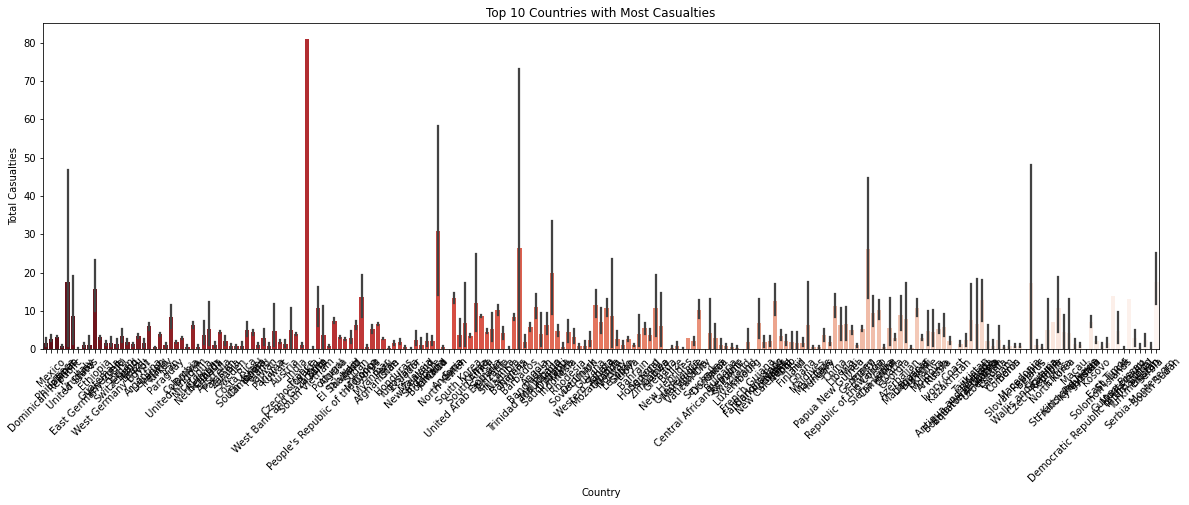

In [8]:
#Top 10 Most Affected Countries
plt.figure(figsize=(20,6))
sns.barplot(x=new_df['country_txt'], y=new_df['casualities'], palette="Reds_r")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Total Casualties")
plt.title("Top 10 Countries with Most Casualties")
plt.show()

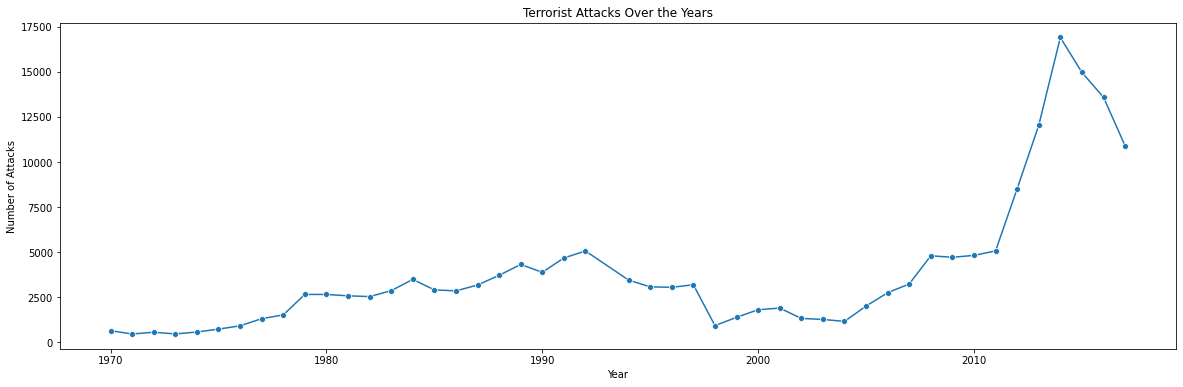

In [9]:
#Terrorist Attacks Over the Years
plt.figure(figsize=(20,6))
sns.lineplot(x=df['iyear'].value_counts().index, y=df['iyear'].value_counts().values, marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Terrorist Attacks Over the Years")
plt.show()

In [10]:
new_df.to_csv("cleaned_global_terrorism.csv")